<table align="center" width=100%>
    <tr>
        <td width="20%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 1)
                    </b>
                </font>
            </div>
        </td>
         <td width="25%">
            <img src="GL-2.png">
        </td>
    </tr>
</table>

### About the dataset (Earthquake data)
The data records the earthquakes experienced for the last few years in the USA. There are four parameters in the data, where each data point represents an earthquake.

**Latitude**: Latitude of the place (above the equator)

**Longitude**: Longitude of the place (west of the prime meridian)

**DepthMeters**: Absolute height of the place

**Magnitude**: Magnitude of the earthquake wave

## Table of Content

1. **[Exploratory Data Analysis](#eda)**
2. **[K-means Clustering](#k-means)**
3. **[Interpret the Clusters](#inter)**

#### Import the required libraries

In [1]:
# write your code here
# write your code here
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
import matplotlib.cm as cm

#### Load the csv file and print the first five observations.

In [2]:
# write your code here
df = pd.read_csv('Earthquake_Data.csv')
df.head()


,Latitude,Longitude,DepthMeters,Magnitude
0,39.644,-75.483,5000,2.8
1,37.379,-80.746,11500,2.8
2,45.296,-73.475,18000,2.1
3,42.825,-78.239,5000,2.4
4,38.619,-80.909,100,3.4


### Let's begin with some hands-on practice exercises

<a id="eda"> </a>
## 1. Exploratory Data Analysis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Find the number of variables and the number of observations in the data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [3]:
# Number of variables (columns)
num_variables = df.shape[1]

# Number of observations (rows)
num_observations = df.shape[0]

num_variables, num_observations


(4, 1647)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Check the datatype of each variable in the data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [4]:
# Check the datatype of each variable
data_types = df.dtypes
data_types


Latitude       float64
Longitude      float64
DepthMeters      int64
Magnitude      float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1647 entries, 0 to 1646
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Latitude     1647 non-null   float64
 1   Longitude    1647 non-null   float64
 2   DepthMeters  1647 non-null   int64  
 3   Magnitude    1647 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 51.6 KB


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Find if there are missing values in the data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [6]:
# Check for missing values in each column
missing_values = df.isnull().sum()
missing_values


Latitude       0
Longitude      0
DepthMeters    0
Magnitude      0
dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Obtain the summary statistic of data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [7]:
# Summary statistics of the DataFrame
summary_statistics = df.describe()
summary_statistics


,Latitude,Longitude,DepthMeters,Magnitude
count,1647.000000,1647.000000,1647.000000,1647.000000
mean,39.903436,-79.008111,7559.720704,2.384827
std,2.410973,3.192442,5205.963953,0.459781
min,37.007700,-82.881000,100.000000,0.200000
25%,37.902400,-81.694150,3450.000000,2.100000
50%,38.477800,-80.831400,6400.000000,2.400000
75%,41.467200,-75.934050,11500.000000,2.600000
max,45.300900,-73.063400,32300.000000,5.200000


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Visualize the outliers in the dataset using boxplot.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

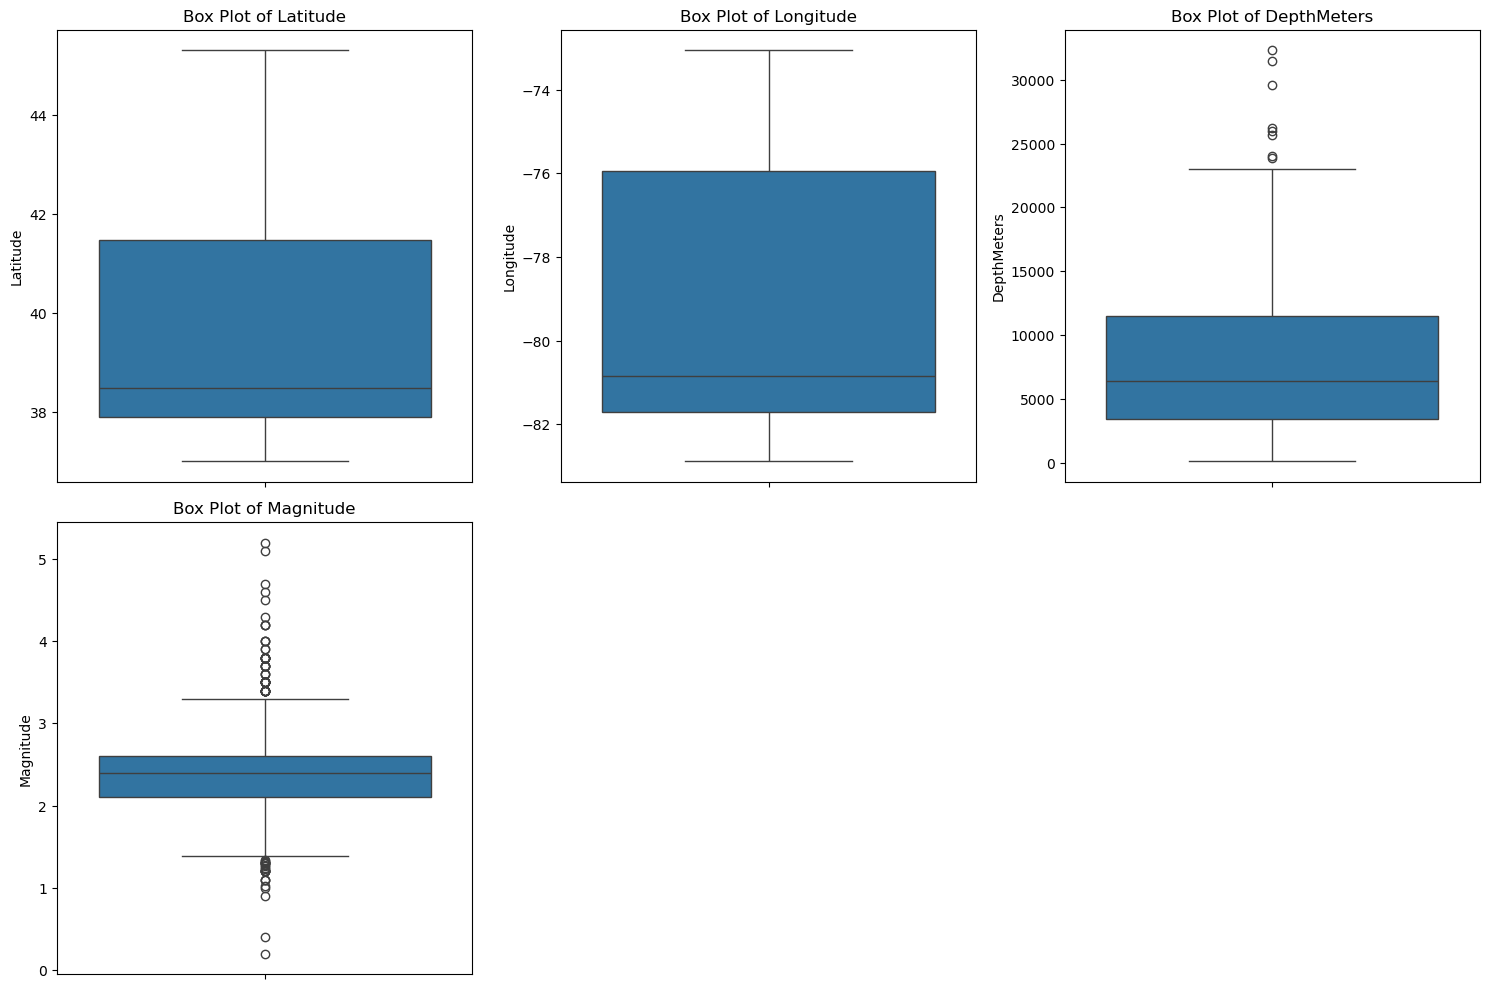

Skewness of each numerical variable:
Latitude       0.746850
Longitude      0.550076
DepthMeters    0.671018
Magnitude      0.630080
dtype: float64


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (assuming you've already loaded it)
# df = pd.read_csv('Earthquake_Data.csv')

# Get the names of all columns with data type 'int' or 'float'
num_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(num_vars)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5 * num_rows))
axs = axs.flatten()

# Create a box plot for each numerical variable
for i, var in enumerate(num_vars):
    sns.boxplot(data=df, y=var, ax=axs[i])
    axs[i].set_title(f'Box Plot of {var}')
    axs[i].set_ylabel(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for j in range(num_cols, len(axs)):
        fig.delaxes(axs[j])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

# Calculate skewness for numerical variables
skewness = df[num_vars].skew()
print("Skewness of each numerical variable:")
print(skewness)


##### Inference
We can see that columns 'DepthMeters' and 'Magnitude' have outliers in their data

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Remove the outliers using the IQR method and check the shape of data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [9]:
# Calculate the IQR for each numerical variable
Q1 = df[num_vars].quantile(0.25)
Q3 = df[num_vars].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a mask to filter out outliers
mask = ~((df[num_vars] < lower_bound) | (df[num_vars] > upper_bound)).any(axis=1)

# Filter the DataFrame
df_cleaned = df[mask]

# Check the shape of the cleaned DataFrame
cleaned_shape = df_cleaned.shape
print("Shape of the DataFrame after removing outliers:", cleaned_shape)


Shape of the DataFrame after removing outliers: (1562, 4)


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Drop the variables representing the geographical coordinates of the earthquake.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [10]:
# Drop the geographical coordinate columns
df_cleaned = df_cleaned.drop(columns=['Latitude', 'Longitude'])

# Check the shape of the DataFrame after dropping the columns
new_shape = df_cleaned.shape
print("Shape of the DataFrame after dropping geographical coordinates:", new_shape)


Shape of the DataFrame after dropping geographical coordinates: (1562, 2)


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Transform the variables such that it will have mean 0 and standard deviation 1 and print the summary statistics.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [11]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
df_scaled = pd.DataFrame(scaler.fit_transform(df_cleaned), columns=df_cleaned.columns)

# Print the summary statistics of the scaled DataFrame
summary_statistics_scaled = df_scaled.describe()
print("Summary statistics after scaling:")
print(summary_statistics_scaled)


Summary statistics after scaling:
        DepthMeters     Magnitude
count  1.562000e+03  1.562000e+03
mean   1.819572e-17  4.037175e-16
std    1.000320e+00  1.000320e+00
min   -1.463207e+00 -2.750825e+00
25%   -8.070463e-01 -7.350195e-01
50%   -2.105364e-01  1.167292e-01
75%    8.035303e-01  6.845617e-01
max    3.090151e+00  2.671975e+00


<a id="k-means"> </a>
## 2. K-means Clustering

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Find within cluster sum of squares for the number of clusters from 1 to 7.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [12]:
from sklearn.cluster import KMeans
import numpy as np

# Initialize an empty list to store WCSS values
wcss = []

# Loop through cluster sizes from 1 to 7
for i in range(1, 8):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)  # WCSS is stored in the inertia_ attribute

# Print the WCSS values
for i, value in enumerate(wcss, start=1):
    print(f'WCSS for {i} clusters: {value}')


WCSS for 1 clusters: 3124.0000000000005
WCSS for 2 clusters: 1949.782447485379
WCSS for 3 clusters: 1257.9770800049273
WCSS for 4 clusters: 964.2748832142154
WCSS for 5 clusters: 849.3221547184947
WCSS for 6 clusters: 673.1142406883928
WCSS for 7 clusters: 590.7114919306068


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Visualize the elbow plot to get the optimal value of K.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

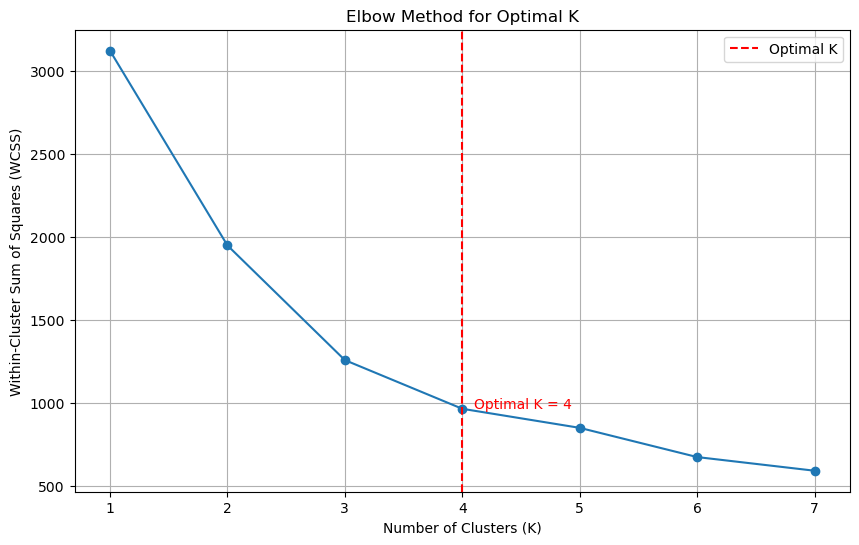

In [13]:
# Create the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, 8), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, 8))
plt.grid()

# Highlight the optimal K
optimal_k = 4  # Adjust this based on your findings

# Add a vertical line and text for the optimal K
plt.axvline(x=optimal_k, color='red', linestyle='--', label='Optimal K')
plt.text(optimal_k + 0.1, wcss[optimal_k - 1], f'Optimal K = {optimal_k}', color='red')

plt.legend()
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Find the silhouette coefficient for the number of clusters from 2 to 7.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [14]:
# write your code here
from sklearn.metrics import silhouette_score

# Initialize an empty list to store silhouette scores
silhouette_scores = []

# Loop through cluster sizes from 2 to 7
for i in range(2, 8):
    kmeans = KMeans(n_clusters=i, random_state=42)
    cluster_labels = kmeans.fit_predict(df_scaled)  # Fit and get cluster labels
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)  # Calculate silhouette score
    silhouette_scores.append(silhouette_avg)  # Store the score

# Print the silhouette scores
for i, score in enumerate(silhouette_scores, start=2):
    print(f'Silhouette Coefficient for {i} clusters: {score}')


Silhouette Coefficient for 2 clusters: 0.3660312475720426
Silhouette Coefficient for 3 clusters: 0.392680039033806
Silhouette Coefficient for 4 clusters: 0.3675083071921581
Silhouette Coefficient for 5 clusters: 0.31956503806611464
Silhouette Coefficient for 6 clusters: 0.3450548492566701
Silhouette Coefficient for 7 clusters: 0.33537477927260323


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Plot of silhouette coefficients using appropriate graphical method.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

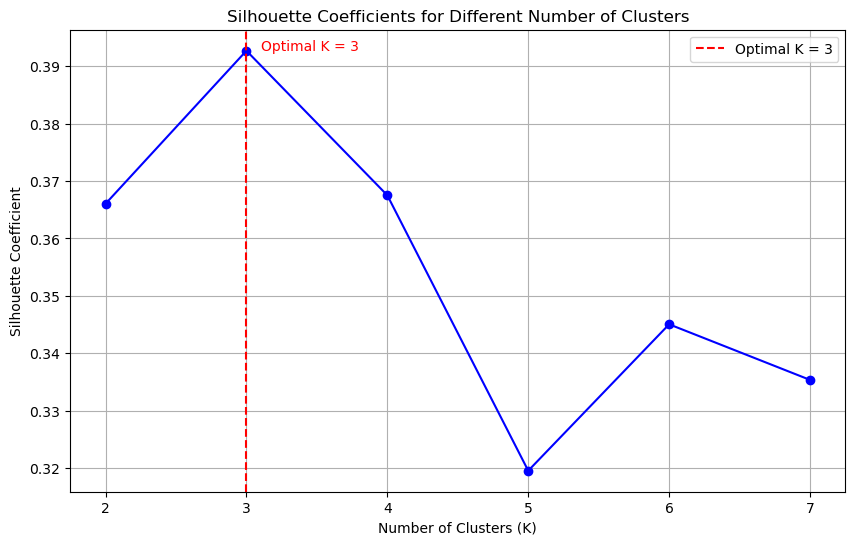

In [15]:
# write your code here
# Number of clusters
clusters = range(2, 8)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(clusters, silhouette_scores, marker='o', linestyle='-', color='blue')
plt.title('Silhouette Coefficients for Different Number of Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Coefficient')
plt.xticks(clusters)
plt.grid()

# Highlight the best K
optimal_k = 3
plt.axvline(x=optimal_k, color='red', linestyle='--', label='Optimal K = 3')
plt.text(optimal_k + 0.1, silhouette_scores[1], 'Optimal K = 3', color='red')

plt.legend()
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Visualize the silhouette scores using silhouette plot and obtain the clusters for K from 2 to 6.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples


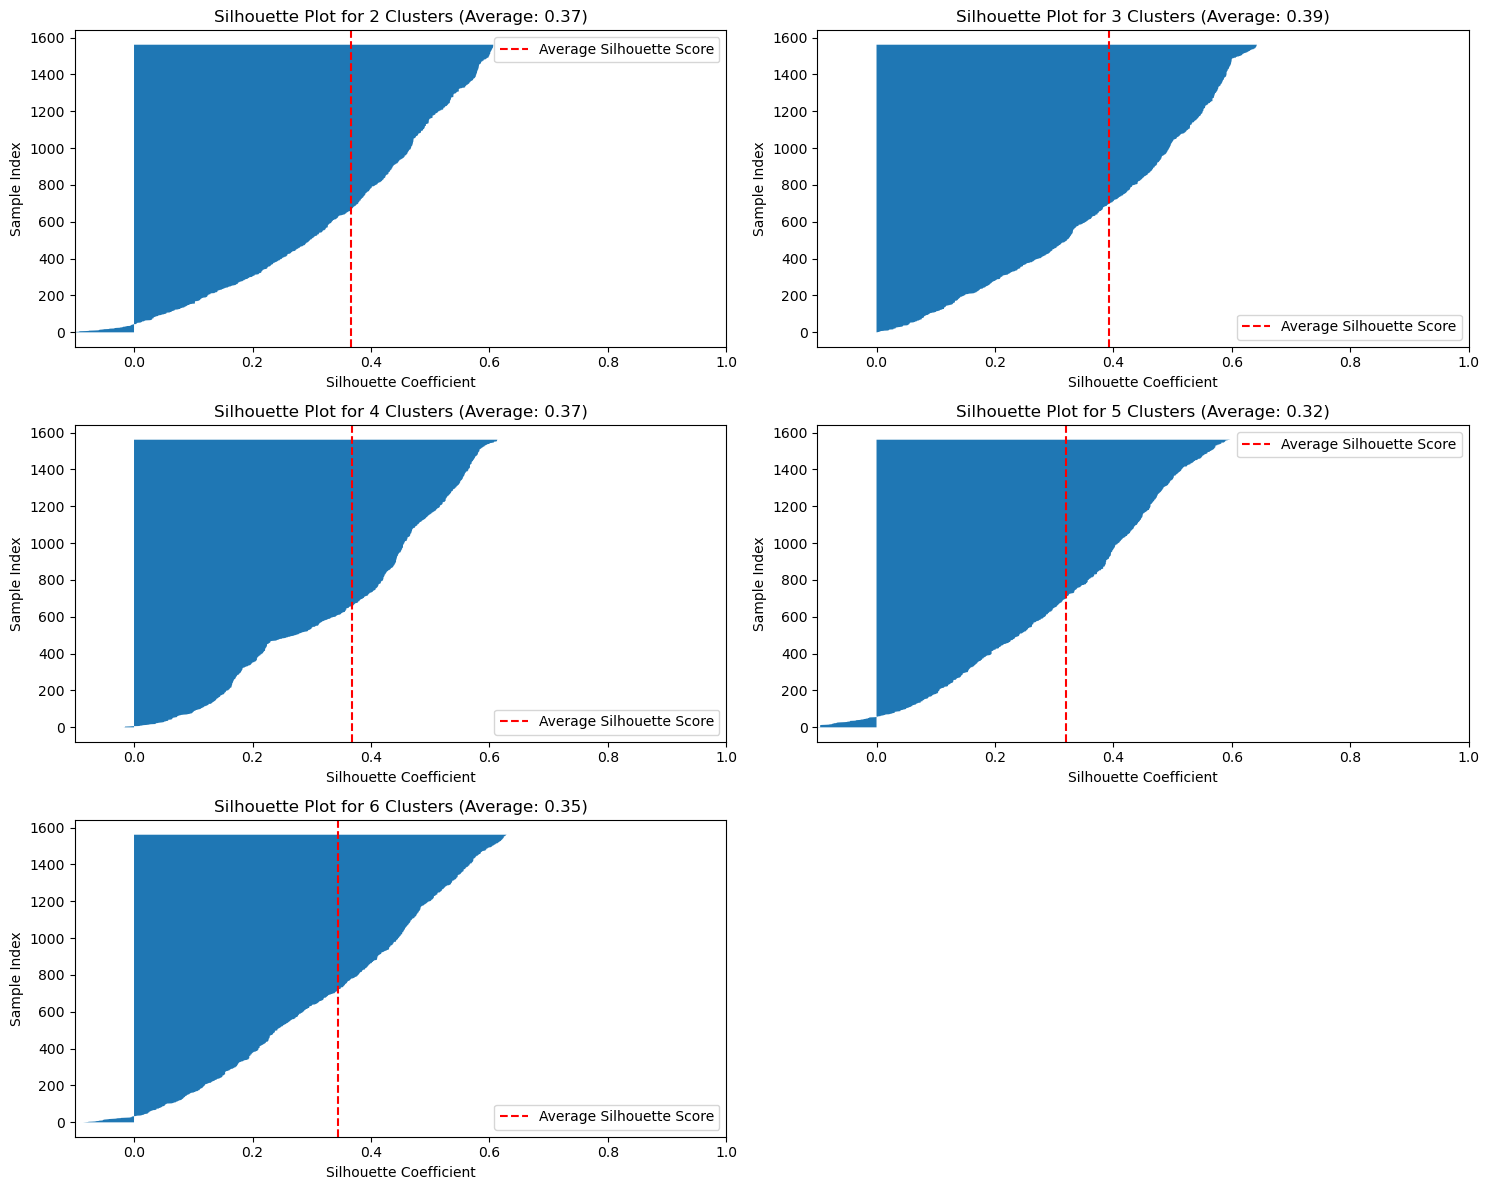

In [17]:
# write your code here
from sklearn.metrics import silhouette_samples

# Set up the number of clusters to evaluate
clusters_range = range(2, 7)

# Create a figure for the silhouette plots
plt.figure(figsize=(15, 12))

for i, k in enumerate(clusters_range, start=1):
    # Fit the KMeans model
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(df_scaled)

    # Calculate silhouette scores for each sample
    silhouette_vals = silhouette_samples(df_scaled, cluster_labels)
    silhouette_avg = np.mean(silhouette_vals)

    # Sort the silhouette scores
    sorted_idx = np.argsort(silhouette_vals)
    sorted_silhouette_vals = silhouette_vals[sorted_idx]

    # Create a subplot
    plt.subplot(3, 2, i)
    plt.fill_betweenx(np.arange(len(sorted_silhouette_vals)), sorted_silhouette_vals, 0)
    plt.title(f'Silhouette Plot for {k} Clusters (Average: {silhouette_avg:.2f})')
    plt.xlabel('Silhouette Coefficient')
    plt.ylabel('Sample Index')
    plt.xlim([-0.1, 1])
    plt.axvline(x=silhouette_avg, color='red', linestyle='--', label='Average Silhouette Score')
    plt.legend()

plt.tight_layout()
plt.show()


In [18]:
from sklearn.metrics import silhouette_samples

# Set up the number of clusters to evaluate
clusters_range = range(2, 7)

# Store the results
results = {}

for k in clusters_range:
    # Fit the KMeans model
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(df_scaled)

    # Calculate silhouette scores for each sample
    silhouette_vals = silhouette_samples(df_scaled, cluster_labels)
    silhouette_avg = np.mean(silhouette_vals)

    # Store the results
    results[k] = {
        'Cluster Labels': cluster_labels,
        'Average Silhouette Score': silhouette_avg
    }

# Print the results
for k, result in results.items():
    print(f'Number of Clusters: {k}')
    print(f'Average Silhouette Score: {result["Average Silhouette Score"]:.2f}')
    print(f'Cluster Labels: {result["Cluster Labels"]}')
    print('\n' + '-' * 50 + '\n')


Number of Clusters: 2
Average Silhouette Score: 0.37
Cluster Labels: [0 0 1 ... 0 1 1]

--------------------------------------------------

Number of Clusters: 3
Average Silhouette Score: 0.39
Cluster Labels: [0 1 1 ... 2 1 1]

--------------------------------------------------

Number of Clusters: 4
Average Silhouette Score: 0.37
Cluster Labels: [0 1 3 ... 2 3 3]

--------------------------------------------------

Number of Clusters: 5
Average Silhouette Score: 0.32
Cluster Labels: [0 1 3 ... 2 3 3]

--------------------------------------------------

Number of Clusters: 6
Average Silhouette Score: 0.35
Cluster Labels: [0 1 3 ... 2 3 3]

--------------------------------------------------



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Fit K means clustering algorithm with an optimal number of clusters.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [19]:
# Assuming df_scaled is already defined and corresponds to the cleaned data
# Ensure to use the DataFrame after dropping outliers and geographical columns

# Fit the KMeans model
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(df_scaled)  # Fit the model and get cluster labels

# Create a new DataFrame with the scaled data and cluster labels
result_df = pd.DataFrame(df_scaled, columns=['DepthMeters', 'Magnitude'])
result_df['Cluster'] = cluster_labels

# Display the first few rows of the DataFrame with cluster labels
print(result_df.head())


   DepthMeters  Magnitude  Cluster
0    -0.488908   1.252394        0
1     0.803530   1.252394        1
2     2.095968  -0.735020        1
3    -0.488908   0.116729        0
4    -1.025767   0.116729        0


<a id="inter"> </a>
## 3. Interpret the Clusters

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Consider the groups formed in the previous question and display the size of each cluster.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [20]:
# write your code here
# Display the size of each cluster
cluster_sizes = result_df['Cluster'].value_counts().sort_index()
print(cluster_sizes)


Cluster
0    685
1    477
2    400
Name: count, dtype: int64


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Plot the number of observations in each cluster.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

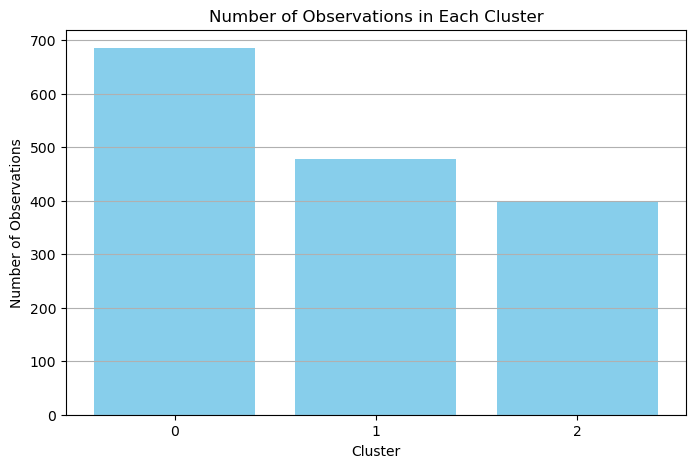

In [21]:
# write your code here
import matplotlib.pyplot as plt

# Plotting the size of each cluster
plt.figure(figsize=(8, 5))
cluster_sizes = result_df['Cluster'].value_counts().sort_index()
plt.bar(cluster_sizes.index, cluster_sizes.values, color='skyblue')
plt.title('Number of Observations in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Observations')
plt.xticks(cluster_sizes.index)  # Ensure all clusters are represented
plt.grid(axis='y')

# Show the plot
plt.show()


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Obtain the centroids of the clusters formed using K-means clustering.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [22]:
# write your code here
# Fit the KMeans model again if needed
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(df_scaled)  # Use the scaled data

# Obtain the centroids of the clusters
centroids = kmeans.cluster_centers_

# Create a DataFrame for better readability
centroids_df = pd.DataFrame(centroids, columns=['DepthMeters', 'Magnitude'])
centroids_df.index.name = 'Cluster'
centroids_df.reset_index(inplace=True)

# Display the centroids
print(centroids_df)


   Cluster  DepthMeters  Magnitude
0        0    -0.719645   0.591926
1        1     1.174746   0.166965
2        2    -0.168492  -1.212780


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Obtain the observations belonging to the 1st cluster and get the summary of the cluster.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [23]:
# write your code here
# Filter observations belonging to Cluster 0
cluster_0_observations = result_df[result_df['Cluster'] == 0]

# Get summary statistics of the cluster
summary_cluster_0 = cluster_0_observations.describe()

# Display the observations and the summary statistics
print("Observations in Cluster 0:")
print(cluster_0_observations)
print("\nSummary Statistics for Cluster 0:")
print(summary_cluster_0)


Observations in Cluster 0:
      DepthMeters  Magnitude  Cluster
0       -0.488908   1.252394        0
3       -0.488908   0.116729        0
4       -1.025767   0.116729        0
7       -0.488908   1.252394        0
8       -0.488908   0.968478        0
...           ...        ...      ...
1549    -1.184836   1.536310        0
1550    -0.488908   2.671975        0
1552     0.306439   1.820227        0
1554    -0.926348   0.116729        0
1555    -0.011700   1.252394        0

[685 rows x 3 columns]

Summary Statistics for Cluster 0:
       DepthMeters   Magnitude  Cluster
count   685.000000  685.000000    685.0
mean     -0.719645    0.591926      0.0
std       0.500074    0.651461      0.0
min      -1.463207   -0.451103      0.0
25%      -1.184836    0.116729      0.0
50%      -0.747395    0.400645      0.0
75%      -0.369606    0.968478      0.0
max       0.505275    2.671975      0.0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Obtain the observations belonging to the 2nd cluster and get the summary of the cluster.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [24]:
# write your code here
# Filter observations belonging to Cluster 1
cluster_1_observations = result_df[result_df['Cluster'] == 1]

# Get summary statistics of the cluster
summary_cluster_1 = cluster_1_observations.describe()

# Display the observations and the summary statistics
print("Observations in Cluster 1:")
print(cluster_1_observations)
print("\nSummary Statistics for Cluster 1:")
print(summary_cluster_1)


Observations in Cluster 1:
      DepthMeters  Magnitude  Cluster
1        0.803530   1.252394        1
2        2.095968  -0.735020        1
5        1.897132   0.400645        1
6        0.644461   0.400645        1
11       1.897132   0.116729        1
...           ...        ...      ...
1556     1.081902   0.400645        1
1557     0.405857  -0.167187        1
1558     0.723996   0.684562        1
1560     1.897132  -0.451103        1
1561     2.274921  -0.451103        1

[477 rows x 3 columns]

Summary Statistics for Cluster 1:
       DepthMeters   Magnitude  Cluster
count   477.000000  477.000000    477.0
mean      1.174746    0.166965      1.0
std       0.566041    0.774963      0.0
min       0.167253   -2.154601      1.0
25%       0.763763   -0.451103      1.0
50%       1.121669    0.116729      1.0
75%       1.479575    0.684562      1.0
max       3.090151    2.671975      1.0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Obtain the observations belonging to the 3rd cluster and get the summary of the cluster.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [25]:
# write your code here
# Filter observations belonging to Cluster 2
cluster_2_observations = result_df[result_df['Cluster'] == 2]

# Get summary statistics of the cluster
summary_cluster_2 = cluster_2_observations.describe()

# Display the observations and the summary statistics
print("Observations in Cluster 2:")
print(cluster_2_observations)
print("\nSummary Statistics for Cluster 2:")
print(summary_cluster_2)


Observations in Cluster 2:
      DepthMeters  Magnitude  Cluster
9       -1.085418  -0.735020        2
13      -0.488908  -1.302852        2
17      -0.628093  -0.735020        2
18      -0.290071  -0.451103        2
22      -0.488908  -1.018936        2
...           ...        ...      ...
1544    -0.449140  -0.451103        2
1546    -0.488908  -1.018936        2
1551    -1.284254  -1.018936        2
1553    -0.290071  -0.735020        2
1559    -0.866697  -0.735020        2

[400 rows x 3 columns]

Summary Statistics for Cluster 2:
       DepthMeters   Magnitude  Cluster
count   400.000000  400.000000    400.0
mean     -0.168492   -1.212780      2.0
std       0.732445    0.601168      0.0
min      -1.463207   -2.750825      2.0
25%      -0.647977   -1.586768      2.0
50%      -0.290071   -1.018936      2.0
75%       0.261203   -0.735020      2.0
max       2.215270   -0.365928      2.0
